## <small>
Copyright (c) 2017-21 Andrew Glassner

Permission is hereby granted, free of charge, to any person obtaining a copy of this software and associated documentation files (the "Software"), to deal in the Software without restriction, including without limitation the rights to use, copy, modify, merge, publish, distribute, sublicense, and/or sell copies of the Software, and to permit persons to whom the Software is furnished to do so, subject to the following conditions:

The above copyright notice and this permission notice shall be included in all copies or substantial portions of the Software.

THE SOFTWARE IS PROVIDED "AS IS", WITHOUT WARRANTY OF ANY KIND, EXPRESS OR IMPLIED, INCLUDING BUT NOT LIMITED TO THE WARRANTIES OF MERCHANTABILITY, FITNESS FOR A PARTICULAR PURPOSE AND NONINFRINGEMENT. IN NO EVENT SHALL THE AUTHORS OR COPYRIGHT HOLDERS BE LIABLE FOR ANY CLAIM, DAMAGES OR OTHER LIABILITY, WHETHER IN AN ACTION OF CONTRACT, TORT OR OTHERWISE, ARISING FROM, OUT OF OR IN CONNECTION WITH THE SOFTWARE OR THE USE OR OTHER DEALINGS IN THE SOFTWARE.
</small>



# Deep Learning: A Visual Approach
## by Andrew Glassner, https://glassner.com
### Order: https://nostarch.com/deep-learning-visual-approach
### GitHub: https://github.com/blueberrymusic
------

### What's in this notebook

This notebook is provided to help you work with Keras and TensorFlow. It accompanies the bonus chapters for my book. The code is in Python3, using the versions of libraries as of April 2021.

Note that I've included the output cells in this saved notebook, but Jupyter doesn't save the variables or data that were used to generate them. To recreate any cell's output, evaluate all the cells from the start up to that cell. A convenient way to experiment is to first choose "Restart & Run All" from the Kernel menu, so that everything's been defined and is up to date. Then you can experiment using the variables, data, functions, and other stuff defined in this notebook.

## Bonus Chapter 2 - Notebook 8: Callbacks

In [1]:
from tensorflow.keras.datasets import mnist
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras import backend as keras_backend
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.callbacks import ModelCheckpoint
import matplotlib.pyplot as plt

import numpy as np

from tensorflow.keras import backend as keras_backend
keras_backend.set_image_data_format('channels_last')

In [2]:
# Workaround for Keras issues on Mac computers (you can comment this
# out if you're not on a Mac, or not having problems)
import os
os.environ['KMP_DUPLICATE_LIB_OK']='True'

In [3]:
# We won't save the weights and models for this notebook because
# generating them with different options is the whole point of 
# these demonstrations.

In [4]:
# Make a File_Helper for saving and loading files.

save_files = False

import os, sys, inspect
current_dir = os.path.dirname(os.path.abspath(inspect.getfile(inspect.currentframe())))
sys.path.insert(0, os.path.dirname(current_dir)) # path to parent dir
from DLBasics_Utilities import File_Helper
file_helper = File_Helper(save_files)

Using TensorFlow backend.


In [5]:
# Build our 2-layer MNIST model to demonstrate callbacks


random_seed = 42

# load MNIST data and save sizes
(X_train, y_train), (X_test, y_test) = mnist.load_data()
image_height = X_train.shape[1]
image_width = X_train.shape[2]
number_of_pixels = image_height * image_width

# convert to floating-point
X_train = keras_backend.cast_to_floatx(X_train)
X_test = keras_backend.cast_to_floatx(X_test)

# scale data to range [0, 1]
X_train /= 255.0
X_test /= 255.0

# save the original y_train and y_test 
original_y_train = y_train
original_y_test = y_test

# replace label data with one-hot encoded versions
number_of_classes = 1 + max(np.append(y_train, y_test))
y_train = to_categorical(y_train, num_classes=number_of_classes)
y_test = to_categorical(y_test, num_classes=number_of_classes)

# reshape samples to 2D grid, one line per image
X_train = X_train.reshape([X_train.shape[0], number_of_pixels])
X_test = X_test.reshape([X_test.shape[0], number_of_pixels])

def make_model():
    model = Sequential()
    model.add(Dense(number_of_pixels, activation='relu',
                    input_shape=[number_of_pixels]))
    model.add(Dense(number_of_classes, activation='softmax'))
    return model

def make_compiled_model():
    model = Sequential()
    model.add(Dense(number_of_pixels, activation='relu',
                    input_shape=[number_of_pixels]))
    model.add(Dense(number_of_classes, activation='softmax'))
    model.compile(loss='categorical_crossentropy', optimizer='adam',
                  metrics=['accuracy'])
    return model

In [6]:
# make the model
model = make_compiled_model()

# seed the random number generator
np.random.seed(random_seed)

# Make a checkpoint routine to save val_loss every 5th epoch
# Ignore the warning from TensorFlow, as this is beyond our control at this level.

checkpoint_folder_name = 'NB08-checkpointed-models'
file_helper.check_for_directory(checkpoint_folder_name)
filename = checkpoint_folder_name+'/model-epoch-{epoch:03d}-val_loss-{val_loss:0.3f}.h5'
checkpointer = ModelCheckpoint(filename, monitor='accuracy', period=1) 

# call fit() to train the model, and save the history
history = model.fit(X_train, y_train,
                    validation_split=0.25, epochs=100, batch_size=256, verbose=2,
                    callbacks = [checkpointer] )

Epoch 1/100
176/176 - 2s - loss: 0.3480 - accuracy: 0.9036 - val_loss: 0.1852 - val_accuracy: 0.9476
Epoch 2/100
176/176 - 1s - loss: 0.1447 - accuracy: 0.9582 - val_loss: 0.1395 - val_accuracy: 0.9594
Epoch 3/100
176/176 - 1s - loss: 0.0957 - accuracy: 0.9727 - val_loss: 0.1110 - val_accuracy: 0.9681
Epoch 4/100
176/176 - 1s - loss: 0.0695 - accuracy: 0.9804 - val_loss: 0.0961 - val_accuracy: 0.9719
Epoch 5/100
176/176 - 1s - loss: 0.0514 - accuracy: 0.9859 - val_loss: 0.0958 - val_accuracy: 0.9706
Epoch 6/100
176/176 - 1s - loss: 0.0386 - accuracy: 0.9898 - val_loss: 0.0903 - val_accuracy: 0.9730
Epoch 7/100
176/176 - 1s - loss: 0.0293 - accuracy: 0.9930 - val_loss: 0.0808 - val_accuracy: 0.9751
Epoch 8/100
176/176 - 1s - loss: 0.0228 - accuracy: 0.9948 - val_loss: 0.0868 - val_accuracy: 0.9738
Epoch 9/100
176/176 - 1s - loss: 0.0184 - accuracy: 0.9960 - val_loss: 0.0819 - val_accuracy: 0.9750
Epoch 10/100
176/176 - 1s - loss: 0.0130 - accuracy: 0.9978 - val_loss: 0.0794 - val_accura

Epoch 78/100
176/176 - 1s - loss: 2.4706e-06 - accuracy: 1.0000 - val_loss: 0.1303 - val_accuracy: 0.9800
Epoch 79/100
176/176 - 1s - loss: 2.2701e-06 - accuracy: 1.0000 - val_loss: 0.1302 - val_accuracy: 0.9799
Epoch 80/100
176/176 - 2s - loss: 2.0790e-06 - accuracy: 1.0000 - val_loss: 0.1310 - val_accuracy: 0.9799
Epoch 81/100
176/176 - 1s - loss: 1.8900e-06 - accuracy: 1.0000 - val_loss: 0.1323 - val_accuracy: 0.9795
Epoch 82/100
176/176 - 1s - loss: 1.7439e-06 - accuracy: 1.0000 - val_loss: 0.1332 - val_accuracy: 0.9798
Epoch 83/100
176/176 - 1s - loss: 1.5791e-06 - accuracy: 1.0000 - val_loss: 0.1335 - val_accuracy: 0.9800
Epoch 84/100
176/176 - 1s - loss: 1.4516e-06 - accuracy: 1.0000 - val_loss: 0.1339 - val_accuracy: 0.9799
Epoch 85/100
176/176 - 1s - loss: 1.3214e-06 - accuracy: 1.0000 - val_loss: 0.1349 - val_accuracy: 0.9800
Epoch 86/100
176/176 - 1s - loss: 1.2078e-06 - accuracy: 1.0000 - val_loss: 0.1358 - val_accuracy: 0.9799
Epoch 87/100
176/176 - 1s - loss: 1.1091e-06 -

In [7]:
# make the model
model = make_compiled_model()

# Make a checkpoint routine to save val_loss every 5th epoch
filename = checkpoint_folder_name+'/model-weights-epoch-{epoch:03d}-acc-{accuracy:0.3f}.h5'
checkpointer = ModelCheckpoint(filename, monitor='accuracy', save_weights_only=True, period=10) 

# call fit() to train the model, and save the history
history = model.fit(X_train, y_train,
                    validation_split=0.25, epochs=100, batch_size=256, verbose=2,
                    callbacks = [checkpointer] )

Epoch 1/100
176/176 - 2s - loss: 0.3383 - accuracy: 0.9056 - val_loss: 0.1859 - val_accuracy: 0.9468
Epoch 2/100
176/176 - 1s - loss: 0.1402 - accuracy: 0.9599 - val_loss: 0.1385 - val_accuracy: 0.9582
Epoch 3/100
176/176 - 2s - loss: 0.0910 - accuracy: 0.9737 - val_loss: 0.1078 - val_accuracy: 0.9683
Epoch 4/100
176/176 - 2s - loss: 0.0668 - accuracy: 0.9809 - val_loss: 0.0932 - val_accuracy: 0.9725
Epoch 5/100
176/176 - 2s - loss: 0.0484 - accuracy: 0.9869 - val_loss: 0.0870 - val_accuracy: 0.9738
Epoch 6/100
176/176 - 1s - loss: 0.0381 - accuracy: 0.9897 - val_loss: 0.0831 - val_accuracy: 0.9754
Epoch 7/100
176/176 - 1s - loss: 0.0291 - accuracy: 0.9926 - val_loss: 0.0819 - val_accuracy: 0.9763
Epoch 8/100
176/176 - 1s - loss: 0.0212 - accuracy: 0.9953 - val_loss: 0.0830 - val_accuracy: 0.9766
Epoch 9/100
176/176 - 2s - loss: 0.0156 - accuracy: 0.9972 - val_loss: 0.0794 - val_accuracy: 0.9774
Epoch 10/100
176/176 - 2s - loss: 0.0120 - accuracy: 0.9980 - val_loss: 0.0764 - val_accura

176/176 - 2s - loss: 4.3380e-06 - accuracy: 1.0000 - val_loss: 0.1228 - val_accuracy: 0.9817
Epoch 79/100
176/176 - 2s - loss: 4.0203e-06 - accuracy: 1.0000 - val_loss: 0.1232 - val_accuracy: 0.9815
Epoch 80/100
176/176 - 2s - loss: 3.6351e-06 - accuracy: 1.0000 - val_loss: 0.1239 - val_accuracy: 0.9817
Epoch 81/100
176/176 - 2s - loss: 3.3426e-06 - accuracy: 1.0000 - val_loss: 0.1247 - val_accuracy: 0.9817
Epoch 82/100
176/176 - 2s - loss: 3.0374e-06 - accuracy: 1.0000 - val_loss: 0.1249 - val_accuracy: 0.9819
Epoch 83/100
176/176 - 2s - loss: 2.8194e-06 - accuracy: 1.0000 - val_loss: 0.1255 - val_accuracy: 0.9817
Epoch 84/100
176/176 - 2s - loss: 2.5806e-06 - accuracy: 1.0000 - val_loss: 0.1266 - val_accuracy: 0.9818
Epoch 85/100
176/176 - 1s - loss: 2.3229e-06 - accuracy: 1.0000 - val_loss: 0.1274 - val_accuracy: 0.9817
Epoch 86/100
176/176 - 1s - loss: 2.1384e-06 - accuracy: 1.0000 - val_loss: 0.1279 - val_accuracy: 0.9816
Epoch 87/100
176/176 - 1s - loss: 1.9435e-06 - accuracy: 1.

In [8]:
# modify the learning rate over time with a callback
from tensorflow.keras.callbacks import LearningRateScheduler
from tensorflow.keras.optimizers import SGD

# make the model but don't compile it
model = make_model()

sgd = SGD(lr=0.0, momentum=0.9, decay=0.0, nesterov=False)
model.compile(loss='binary_crossentropy', optimizer=sgd, metrics=['accuracy'])

def simpleSchedule(epoch_number):
    return max(.1, 1-(0.01*epoch_number)) # start at 1 & drop to 0.1

lr_scheduler = LearningRateScheduler(simpleSchedule)

history = model.fit(X_train, y_train, validation_split=0.25, 
                    epochs=100, batch_size=256, verbose=2,
                    callbacks=[lr_scheduler])

Epoch 1/100
176/176 - 2s - loss: 0.0716 - accuracy: 0.8916 - val_loss: 0.0346 - val_accuracy: 0.9490
Epoch 2/100
176/176 - 1s - loss: 0.0278 - accuracy: 0.9596 - val_loss: 0.0253 - val_accuracy: 0.9628
Epoch 3/100
176/176 - 1s - loss: 0.0201 - accuracy: 0.9733 - val_loss: 0.0210 - val_accuracy: 0.9699
Epoch 4/100
176/176 - 1s - loss: 0.0159 - accuracy: 0.9794 - val_loss: 0.0202 - val_accuracy: 0.9726
Epoch 5/100
176/176 - 1s - loss: 0.0130 - accuracy: 0.9845 - val_loss: 0.0179 - val_accuracy: 0.9748
Epoch 6/100
176/176 - 1s - loss: 0.0108 - accuracy: 0.9870 - val_loss: 0.0176 - val_accuracy: 0.9752
Epoch 7/100
176/176 - 1s - loss: 0.0092 - accuracy: 0.9901 - val_loss: 0.0175 - val_accuracy: 0.9747
Epoch 8/100
176/176 - 1s - loss: 0.0079 - accuracy: 0.9920 - val_loss: 0.0170 - val_accuracy: 0.9763
Epoch 9/100
176/176 - 2s - loss: 0.0067 - accuracy: 0.9936 - val_loss: 0.0162 - val_accuracy: 0.9777
Epoch 10/100
176/176 - 2s - loss: 0.0060 - accuracy: 0.9948 - val_loss: 0.0162 - val_accura

Epoch 80/100
176/176 - 1s - loss: 2.6582e-04 - accuracy: 1.0000 - val_loss: 0.0181 - val_accuracy: 0.9811
Epoch 81/100
176/176 - 1s - loss: 2.6406e-04 - accuracy: 1.0000 - val_loss: 0.0181 - val_accuracy: 0.9808
Epoch 82/100
176/176 - 1s - loss: 2.6253e-04 - accuracy: 1.0000 - val_loss: 0.0182 - val_accuracy: 0.9809
Epoch 83/100
176/176 - 2s - loss: 2.6105e-04 - accuracy: 1.0000 - val_loss: 0.0182 - val_accuracy: 0.9810
Epoch 84/100
176/176 - 1s - loss: 2.5948e-04 - accuracy: 1.0000 - val_loss: 0.0182 - val_accuracy: 0.9809
Epoch 85/100
176/176 - 2s - loss: 2.5778e-04 - accuracy: 1.0000 - val_loss: 0.0182 - val_accuracy: 0.9811
Epoch 86/100
176/176 - 2s - loss: 2.5646e-04 - accuracy: 1.0000 - val_loss: 0.0182 - val_accuracy: 0.9811
Epoch 87/100
176/176 - 1s - loss: 2.5543e-04 - accuracy: 1.0000 - val_loss: 0.0182 - val_accuracy: 0.9809
Epoch 88/100
176/176 - 1s - loss: 2.5430e-04 - accuracy: 1.0000 - val_loss: 0.0182 - val_accuracy: 0.9809
Epoch 89/100
176/176 - 2s - loss: 2.5330e-04 -

In [9]:
# stop when the validation loss starts going back up
from tensorflow.keras.callbacks import EarlyStopping

# make the model
model = make_compiled_model()

early_stopper = EarlyStopping(monitor='val_loss', patience=10, verbose=1)

history = model.fit(X_train, y_train, validation_split=0.25, 
                    epochs=100, batch_size=256, verbose=2,
                    callbacks=[early_stopper])

Epoch 1/100
176/176 - 2s - loss: 0.3490 - accuracy: 0.9008 - val_loss: 0.1911 - val_accuracy: 0.9463
Epoch 2/100
176/176 - 2s - loss: 0.1440 - accuracy: 0.9591 - val_loss: 0.1334 - val_accuracy: 0.9605
Epoch 3/100
176/176 - 2s - loss: 0.0954 - accuracy: 0.9734 - val_loss: 0.1090 - val_accuracy: 0.9682
Epoch 4/100
176/176 - 2s - loss: 0.0676 - accuracy: 0.9809 - val_loss: 0.1023 - val_accuracy: 0.9687
Epoch 5/100
176/176 - 2s - loss: 0.0506 - accuracy: 0.9862 - val_loss: 0.0903 - val_accuracy: 0.9725
Epoch 6/100
176/176 - 1s - loss: 0.0394 - accuracy: 0.9891 - val_loss: 0.0855 - val_accuracy: 0.9742
Epoch 7/100
176/176 - 1s - loss: 0.0287 - accuracy: 0.9932 - val_loss: 0.0846 - val_accuracy: 0.9746
Epoch 8/100
176/176 - 2s - loss: 0.0222 - accuracy: 0.9946 - val_loss: 0.0855 - val_accuracy: 0.9746
Epoch 9/100
176/176 - 2s - loss: 0.0171 - accuracy: 0.9966 - val_loss: 0.0835 - val_accuracy: 0.9761
Epoch 10/100
176/176 - 1s - loss: 0.0133 - accuracy: 0.9974 - val_loss: 0.0835 - val_accura

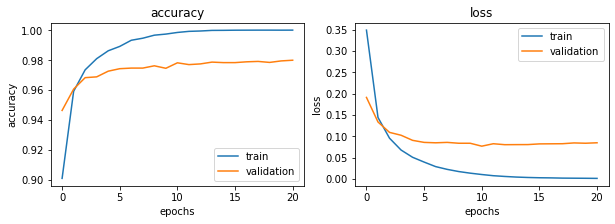

In [10]:
xs = range(len(history.history['accuracy']))

plt.figure(figsize=(10,3))
plt.subplot(1, 2, 1)
plt.plot(xs, history.history['accuracy'], label='train')
plt.plot(xs, history.history['val_accuracy'], label='validation')
plt.legend(loc='lower right')
plt.xlabel('epochs')
plt.ylabel('accuracy')
plt.title('accuracy')

plt.subplot(1, 2, 2)
plt.plot(xs, history.history['loss'], label='train')
plt.plot(xs, history.history['val_loss'], label='validation')
plt.legend(loc='upper right')
plt.xlabel('epochs')
plt.ylabel('loss')
plt.title('loss')

file_helper.save_figure('early-stopping-demo')
plt.show()